In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_auc_score
)
import numpy as np
from prepare_data import train_loader, val_loader, test_loader


Number of classes: 31
✅ Dataset split completed successfully!
Classes: ['Akshay_Kumar', 'Alexandra_Daddario', 'Alia_Bhatt', 'Amitabh_Bachchan', 'Andy_Samberg', 'Anushka_Sharma', 'Billie_Eilish', 'Brad_Pitt', 'Camila_Cabello', 'Charlize_Theron', 'Claire_Holt', 'Courtney_Cox', 'Dwayne_Johnson', 'Elizabeth_Olsen', 'Ellen_Degeneres', 'Henry_Cavill', 'Hrithik_Roshan', 'Hugh_Jackman', 'Jessica_Alba', 'Kashyap', 'Lisa_Kudrow', 'Margot_Robbie', 'Marmik', 'Natalie_Portman', 'Priyanka_Chopra', 'Robert_Downey_Jr', 'Roger_Federer', 'Tom_Cruise', 'Vijay_Deverakonda', 'Virat_Kohli', 'Zac_Efron']
Number of training images: 2554
Number of validation images: 1428
Number of test images: 1463


In [2]:
device = torch.device("cpu")
print("Using device:", device)

# Load pretrained model
resnet = models.resnet50(weights="IMAGENET1K_V1")

# Freeze all layers
for param in resnet.parameters():
    param.requires_grad = False

# Replace final FC for 31 classes
num_ftrs = resnet.fc.in_features
resnet.fc = nn.Linear(num_ftrs, 31)

resnet = resnet.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.fc.parameters(), lr=1e-4)


Using device: cpu
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/doaa/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [03:49<00:00, 447kB/s] 


In [8]:
num_epochs = 10
train_acc_list = []
val_acc_list = []
train_loss_list = []

for epoch in range(num_epochs):
    resnet.train()
    train_loss = 0
    all_preds = []
    all_labels = []

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = resnet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        all_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    train_acc = accuracy_score(all_labels, all_preds)
    train_precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    train_recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
    train_f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)

    resnet.eval()
    val_preds = []
    val_labels = []

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = resnet(images)
            val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

    val_acc = accuracy_score(val_labels, val_preds)
    val_precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
    val_recall = recall_score(val_labels, val_preds, average='weighted', zero_division=0)
    val_f1 = f1_score(val_labels, val_preds, average='weighted', zero_division=0)
    
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)
    train_loss_list.append(train_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f} | "
          f"Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}")


Epoch [1/10] Train Acc: 0.5728, Val Acc: 0.6169 | Precision: 0.5706, Recall: 0.5728, F1: 0.5638
Epoch [2/10] Train Acc: 0.5920, Val Acc: 0.6071 | Precision: 0.5938, Recall: 0.5920, F1: 0.5834
Epoch [3/10] Train Acc: 0.6057, Val Acc: 0.6408 | Precision: 0.6048, Recall: 0.6057, F1: 0.5978
Epoch [4/10] Train Acc: 0.6261, Val Acc: 0.6625 | Precision: 0.6269, Recall: 0.6261, F1: 0.6196
Epoch [5/10] Train Acc: 0.6233, Val Acc: 0.6541 | Precision: 0.6238, Recall: 0.6233, F1: 0.6180
Epoch [6/10] Train Acc: 0.6351, Val Acc: 0.6583 | Precision: 0.6357, Recall: 0.6351, F1: 0.6306
Epoch [7/10] Train Acc: 0.6339, Val Acc: 0.6863 | Precision: 0.6364, Recall: 0.6339, F1: 0.6296
Epoch [8/10] Train Acc: 0.6398, Val Acc: 0.6856 | Precision: 0.6384, Recall: 0.6398, F1: 0.6349
Epoch [9/10] Train Acc: 0.6464, Val Acc: 0.6709 | Precision: 0.6440, Recall: 0.6464, F1: 0.6416
Epoch [10/10] Train Acc: 0.6476, Val Acc: 0.6828 | Precision: 0.6472, Recall: 0.6476, F1: 0.6439


In [11]:
cm = confusion_matrix(val_labels, val_preds)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[13  0  0  0  1  0  0  1  0  0  0  0  2  0  0  1  2  2  0  0  1  0  0  0
   2  1  0  0  1  0  0]
 [ 0 46  0  0  0  0  2  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  3 26  0  1  6  1  0  1  0  0  0  0  1  0  0  0  0  1  0  0  0  0  0
   5  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  1  2  0  1  0  1  4  0  0  1  0  1  0  0  0  0  1  0
   0  0  0  1  1  0  2]
 [ 0  5  2  0  0 17  1  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
   6  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 55  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   1  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  1 47  1  0  0  0  0  1  0  0  1  3  0  0  0  0  1  0
   1  8  0  0  0  0  2]
 [ 0  1  1  0  0  0  1  0 44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   2  0  0  0  0  0  0]
 [ 0  1  0  0  0  0 10  0  1 23  5  0  0  3  1  0  1  0  0  0  1  0  0  0
   1  0  0  0  0  0  0]
 [

In [12]:
val_probs = []

resnet.eval()
with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        outputs = resnet(images)
        probs = torch.softmax(outputs, dim=1).cpu().numpy()
        val_probs.extend(probs)

val_probs = np.array(val_probs)
val_labels_np = np.array(val_labels)

auc = roc_auc_score(val_labels_np, val_probs, multi_class="ovr")
print("AUC:", auc)


AUC: 0.9812457815139995


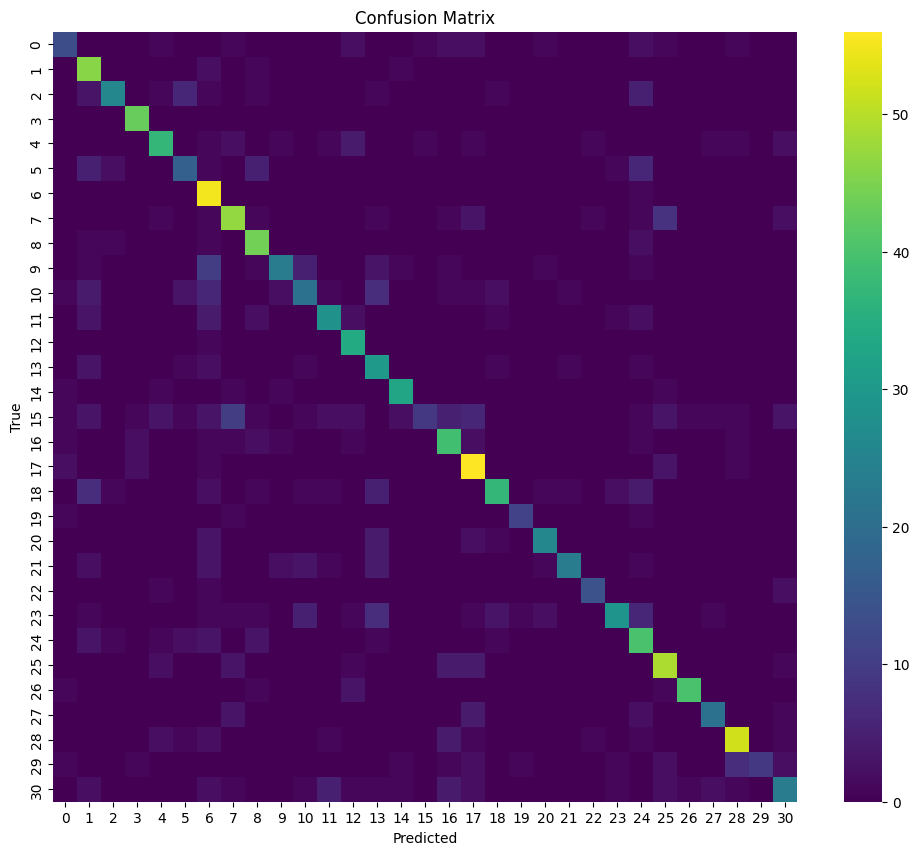

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(val_labels, val_preds)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap="viridis")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


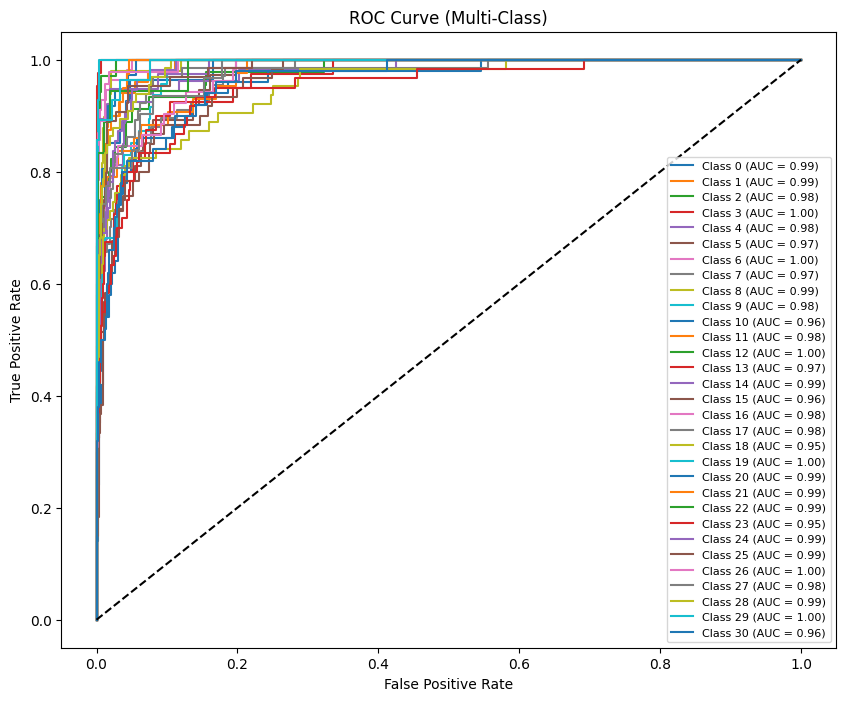

In [14]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_true = label_binarize(val_labels, classes=list(range(31)))
y_score = val_probs

plt.figure(figsize=(10, 8))

for i in range(31):
    fpr, tpr, _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve (Multi-Class)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(fontsize=8)
plt.show()


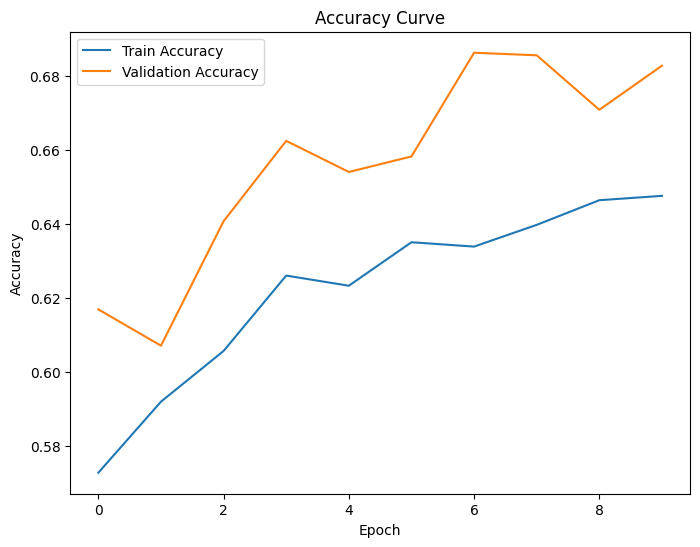

In [9]:
plt.figure(figsize=(8,6))
plt.plot(train_acc_list, label="Train Accuracy")
plt.plot(val_acc_list, label="Validation Accuracy")
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


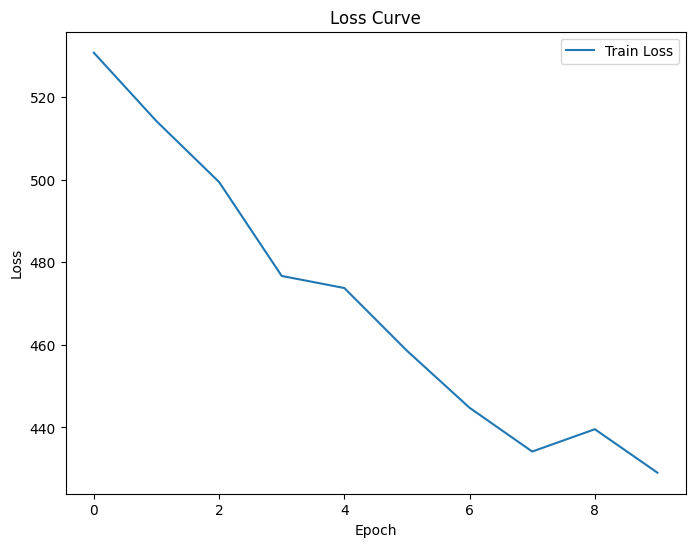

In [10]:
plt.figure(figsize=(8,6))
plt.plot(train_loss_list, label="Train Loss")
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
